# Implementation of Toy Neural Network in 2 Dimensions

[CS231 Module 1](https://cs231n.github.io/neural-networks-case-study/)

# Import Libraries

In [22]:
import numpy as np
from matplotlib import pyplot as plt

# Generate Data

Three classes of data that are not linearly separable

In [23]:
N = 100 # Number of points per class
D = 2 # Dimensionality
K = 3 # Number of classes
X = np.zeros((N * K, D)) # Data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8') # Class labels

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N) # Radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # Theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

## Visualise Data

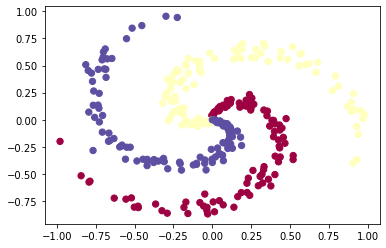

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# Train Softmax Classifier

## Initialise the Parameters

In [25]:
W = 0.01 * np.random.randn(D, K) # Random initialisation
b = np.zeros((1, K))

In [26]:
step_size = 1e-0
reg = 1e-3 # regularization strength

## Compute the Class Scores

In [27]:
scores = np.dot(X, W) + b # For linear classifier

## Compute the Loss

In [28]:
num_examples = X.shape[0]
exp_scores = np.exp(scores) # Get unnormalised probabilities
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # Normalise all for each example

In [29]:
correct_logprobs = -np.log(probs[range(num_examples), y])

In [30]:
data_loss = np.sum(correct_logprobs) / num_examples
reg_loss = 0.5 * reg * np.sum(W * W)
loss = data_loss + reg_loss

In [31]:
loss

1.097501139348871

`loss` in the beginning is `-np.log(1.0/3)`, since with small initial random weights all probabilities assigned to all classes are about one third. `loss` should be as low as possible (minimum = 0)

## Compute the Analytic Gradient With Backpropagation

### Gradient Descent

Minimise the loss using gradient descent. Find out how to change the parameters to decrease the loss.

In [32]:
dscores = probs
dscores [range(num_examples), y] -= 1
dscores /= num_examples

In [33]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg * W

## Performing Parameter Update

Perform a parameter update in the negative gradient direction to decrease the loss

In [34]:
W += -step_size * dW
b += -step_size * db

# Putting Everything Together

In [35]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print(f"iteration {i}: loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.0959032135867228
iteration 10: loss 0.9127992516218413
iteration 20: loss 0.8460294678296146
iteration 30: loss 0.8165430298690112
iteration 40: loss 0.8016816600215262
iteration 50: loss 0.7935060263997599
iteration 60: loss 0.7887286832957291
iteration 70: loss 0.7858133329610627
iteration 80: loss 0.7839758170635214
iteration 90: loss 0.782788605446248
iteration 100: loss 0.782006523583193
iteration 110: loss 0.7814832941640801
iteration 120: loss 0.7811288434831613
iteration 130: loss 0.7808862689878893
iteration 140: loss 0.7807188614880336
iteration 150: loss 0.7806025244083115
iteration 160: loss 0.7805212098604166
iteration 170: loss 0.7804640998944486
iteration 180: loss 0.780423827320288
iteration 190: loss 0.7803953315906806


# Evaluate Training Set Accuracy

In [36]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print(f"training accuracy: {np.mean(predicted_class == y)}")

training accuracy: 0.5233333333333333


# Plot Graph


(-1.9799608370426869, 1.9600391629573166)

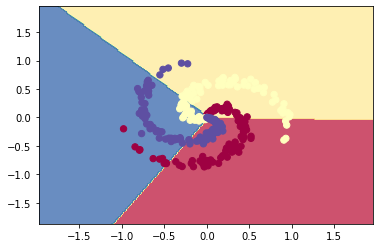

In [37]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())

Mediocre accuracy.

# Training a Neural Network

In [38]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K) # add one more layer
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print(f"iteration {i}: loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.0986560920275363
iteration 1000: loss 0.3283185843877653
iteration 2000: loss 0.2660512015444432
iteration 3000: loss 0.2574490020026717
iteration 4000: loss 0.2542293293980627
iteration 5000: loss 0.25321679478981984
iteration 6000: loss 0.2526847970241496
iteration 7000: loss 0.25247693214129074
iteration 8000: loss 0.2523699988330743
iteration 9000: loss 0.25219739752366455


# Evaluate Training Set Accuracy

In [39]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print(f"training accuracy: {np.mean(predicted_class == y)}")

training accuracy: 0.9866666666666667


Very good accuracy.

# Plot Graph

(-1.8681695657570352, 1.9518304342429682)

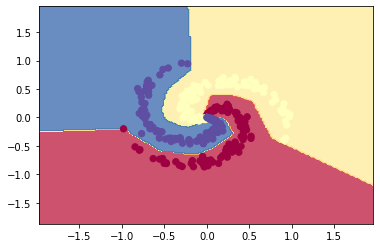

In [40]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())